<a href="https://colab.research.google.com/github/akashlogics/prodigy-infotech-intership/blob/main/prodigy_infotech_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mall Customer Segmentation Data**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('/content/Mall_Customers.csv'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

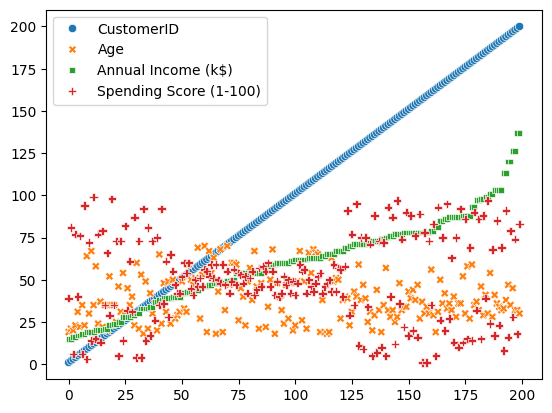

In [ ]:
sns.scatterplot(data=df)

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

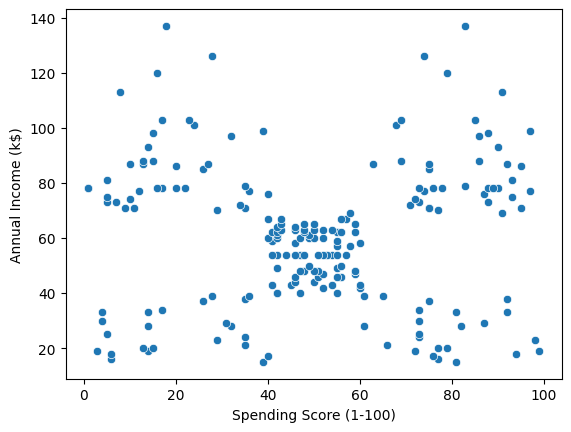

In [ ]:
sns.scatterplot(data=df,x="Spending Score (1-100)",y="Annual Income (k$)")

<Axes: xlabel='Age', ylabel='Count'>

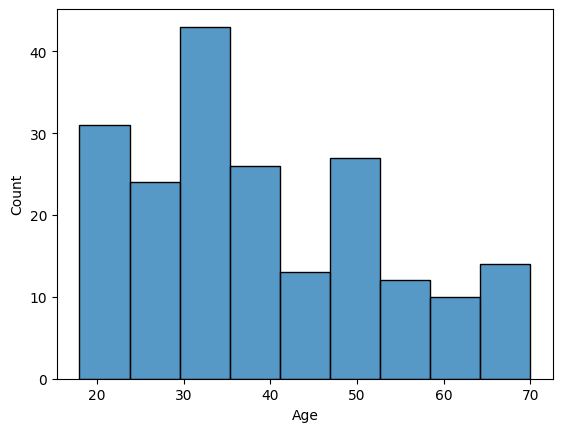

In [ ]:
sns.histplot(data=df,x="Age")

In [ ]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Spending Score (1-100)','Annual Income (k$)']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

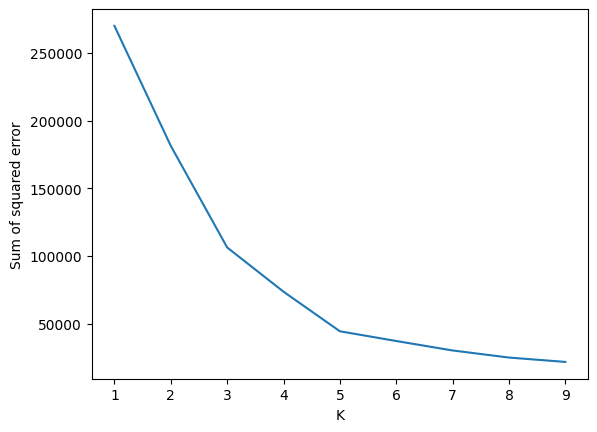

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
clf=KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Spending Score (1-100)','Annual Income (k$)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([6, 3, 4, 3, 6, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 6, 3, 6, 3, 6, 3,
       4, 3, 4, 3, 6, 3, 6, 3, 4, 3, 4, 3, 4, 3, 4, 3, 6, 3, 6, 3, 6, 0,
       6, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 8, 8, 0, 0, 0, 0,
       0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 8, 2, 8, 2, 5, 2, 5, 2,
       8, 2, 5, 2, 5, 2, 5, 2, 5, 2, 8, 2, 5, 2, 8, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 8, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 1, 2, 1, 2, 1, 2, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7,
       1, 7], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,6
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,6


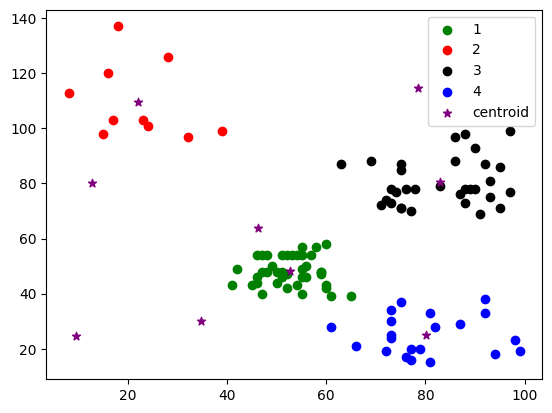

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'] ,color='green',label='1')
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'] ,color='red',label='2')
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'] ,color='black',label='3')
plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],color='blue',label='4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>],
       [<Axes: title={'center': 'cluster'}>, <Axes: >]], dtype=object)

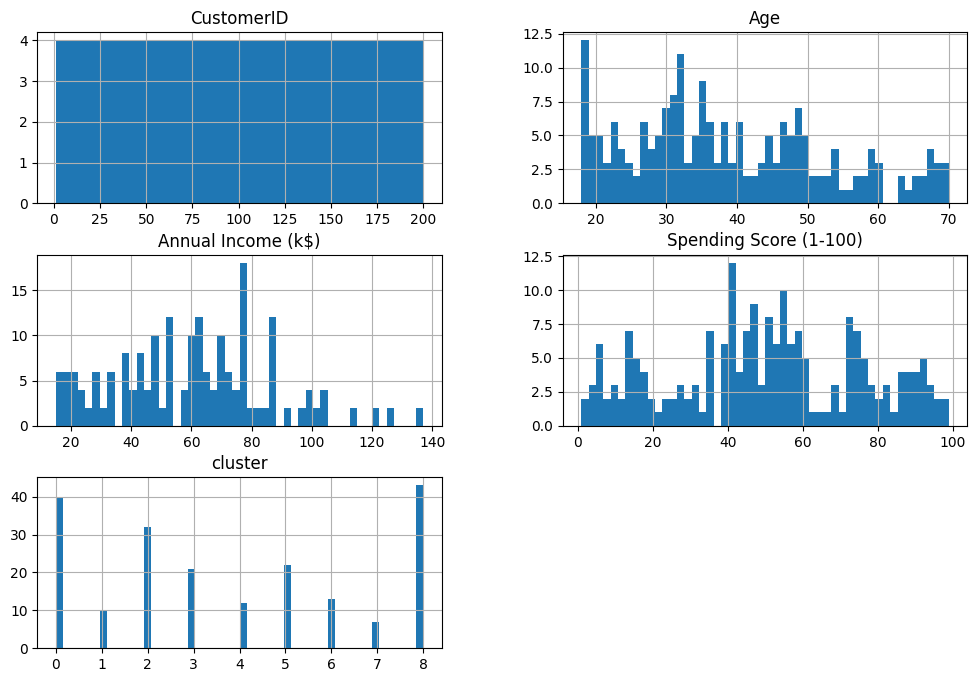

In [ ]:
df.hist(bins=50,figsize=(12,8))